<a href="https://colab.research.google.com/github/Akshaya21513/Codeway/blob/main/Task2(Credit_card_Fraud_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK - 2 (CREDIT CARD FRAUD DETECTION)**

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or legitimate.

#**Load dataset**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/csv/fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

##**Chnage data type to numbericals**

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1 = df.apply(LabelEncoder().fit_transform)
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,409,319,10,186,151,115,1,341,...,182,663,794,275,376,98699,0,114727,392332,0
1,1,1,552,591,10,2884,163,457,0,354,...,524,96,89,392,760,108785,1,277654,59408,0
2,2,2,596,611,5,4028,24,249,0,865,...,558,860,675,259,421,433979,2,332793,510508,0
3,3,3,583,222,9,5905,42,457,1,320,...,29,666,702,407,718,71993,3,19517,399880,0
4,4,4,470,292,13,219,247,261,1,548,...,808,523,254,196,177,190585,4,501776,305489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,544755,199,507,5,4277,235,315,1,531,...,542,341,142,460,334,336391,544755,302830,217045,0
555715,555715,544756,518,264,7,11084,171,424,1,540,...,34,262,666,198,890,70372,544756,26550,150081,0
555716,555716,544757,798,496,7,8588,18,239,0,126,...,873,49,455,294,609,235088,544757,526039,26328,0
555717,555717,544758,77,75,13,699,111,342,1,663,...,825,72,33,58,331,43546,544758,490828,40501,0


#**Data preparation**

##data seperation as x and y


In [6]:
y = df1['is_fraud']
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [7]:
X = df1.drop('is_fraud',axis=1)
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,0,409,319,10,186,151,115,1,341,...,254,182,663,794,275,376,98699,0,114727,392332
1,1,1,552,591,10,2884,163,457,0,354,...,811,524,96,89,392,760,108785,1,277654,59408
2,2,2,596,611,5,4028,24,249,0,865,...,69,558,860,675,259,421,433979,2,332793,510508
3,3,3,583,222,9,5905,42,457,1,320,...,291,29,666,702,407,718,71993,3,19517,399880
4,4,4,470,292,13,219,247,261,1,548,...,478,808,523,254,196,177,190585,4,501776,305489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,544755,199,507,5,4277,235,315,1,531,...,618,542,341,142,460,334,336391,544755,302830,217045
555715,555715,544756,518,264,7,11084,171,424,1,540,...,763,34,262,666,198,890,70372,544756,26550,150081
555716,555716,544757,798,496,7,8588,18,239,0,126,...,908,873,49,455,294,609,235088,544757,526039,26328
555717,555717,544758,77,75,13,699,111,342,1,663,...,808,825,72,33,58,331,43546,544758,490828,40501


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Unnamed: 0             555719 non-null  int64
 1   trans_date_trans_time  555719 non-null  int64
 2   cc_num                 555719 non-null  int64
 3   merchant               555719 non-null  int64
 4   category               555719 non-null  int64
 5   amt                    555719 non-null  int64
 6   first                  555719 non-null  int64
 7   last                   555719 non-null  int64
 8   gender                 555719 non-null  int64
 9   street                 555719 non-null  int64
 10  city                   555719 non-null  int64
 11  state                  555719 non-null  int64
 12  zip                    555719 non-null  int64
 13  lat                    555719 non-null  int64
 14  long                   555719 non-null  int64
 15  city_pop         

##**Balance Data**

In [9]:
y.value_counts()  #unbalanced

0    553574
1      2145
Name: is_fraud, dtype: int64

<Axes: ylabel='is_fraud'>

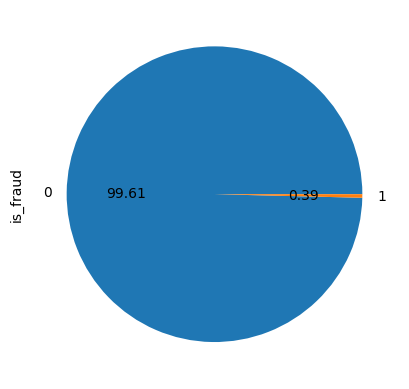

In [10]:
y.value_counts().plot.pie(autopct='%.2f')   #plot is pandas built in pandas

**random undersampling** =  majority ko reduce karna so 50 -50

"not minortity" = resample all classes but the minority class

**random oversampling** = minroity to increase karte

"not majority" = resample all classes but the majority class

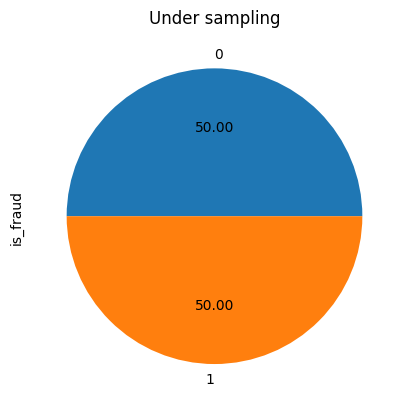

In [11]:
#random undersampling
from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy=1)#Float
rus = RandomUnderSampler(sampling_strategy = "not minority") #STRING
X_res,y_res = rus.fit_resample(X,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under sampling")

In [12]:
# #random over sampling
# from imblearn.over_sampling import RandomOverSampler
# #ros = RadnomeOverSampler(sampling_strategy=1)#Float
# ros = RandomOverSampler(sampling_strategy = "not majority") #STRING
# X_res,y_res = ros.fit_resample(X,y)

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Over sampling")

In [13]:
y_res.value_counts()

0    2145
1    2145
Name: is_fraud, dtype: int64

##**data splitting**

X = X_res
y = y_res


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state=100)

In [15]:
X_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
4140,454063,445988,148,98,1,10511,159,413,0,613,...,387,386,557,618,10,428,187664,445988,268660,334213
328,503387,493967,601,538,0,1006,85,182,0,28,...,694,237,352,1,254,210,492925,493967,123776,216233
1006,194644,191158,170,342,8,33083,213,245,0,848,...,590,560,358,190,171,465,141275,191158,354266,231444
1824,487554,478493,570,129,1,1859,89,127,0,176,...,827,231,110,92,425,563,101747,478493,131639,66451
1294,181381,178121,771,303,8,484,168,28,1,308,...,41,592,830,623,360,816,138221,178121,374244,518311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,456449,448334,583,192,7,1651,42,457,1,320,...,291,29,666,702,407,718,412370,448334,12612,422896
1890,396330,389786,186,445,5,7367,129,429,1,273,...,156,523,785,211,199,621,442533,389786,289822,483532
350,54795,53740,594,130,4,8652,222,5,1,236,...,688,187,287,602,396,202,412027,53740,136406,178950
79,143066,140453,282,521,9,3982,289,229,1,301,...,896,867,51,279,113,537,38482,140453,526341,32477


In [16]:
X_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
1136,76765,75345,490,209,11,821,65,282,0,501,...,904,888,43,159,281,393,164207,75345,528954,26758
1923,301903,296730,826,498,2,6748,50,221,1,135,...,166,488,802,106,269,86,15542,296730,329937,487942
2403,62042,60878,454,491,12,35260,301,125,1,792,...,108,746,755,600,109,144,227582,60878,451388,452574
2281,32204,31570,800,334,1,13133,115,71,0,332,...,787,464,126,792,473,513,442529,31570,290108,78532
2759,138357,135836,102,162,2,638,301,439,1,307,...,328,217,494,447,133,573,158483,135836,122456,285955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,191404,187959,535,268,4,25694,319,392,1,92,...,885,850,13,664,383,549,384564,187959,519893,6478
1514,70164,68818,778,600,3,6277,308,13,0,150,...,412,634,627,570,279,741,79884,68818,406932,375381
1637,478981,470228,736,545,12,337,69,99,0,783,...,701,284,345,503,324,546,240052,470228,193285,207227
2762,138644,136119,102,678,4,26468,301,439,1,307,...,328,217,494,447,133,573,475173,136119,134355,315755


#**Model Building**

##a)Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
lr = LogisticRegression()

In [19]:
# training the Logistic Regression Model with Training Data
lr.fit(X_train, y_train)

LogisticRegression()

###Applying the model to make a prediction

In [20]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [21]:
y_lr_train_pred  #these are all the predictions

array([0, 0, 1, ..., 0, 0, 1])

In [22]:
y_lr_test_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [24]:
print("LR MSE(Train): ", lr_train_mse)
print("LR R2(Train): " ,lr_train_r2)
print("LR MSE(Test): " ,lr_test_mse)
print("LR R2(Test): " ,lr_test_r2)

LR MSE(Train):  0.1687062937062937
LR R2(Train):  0.32516359568526443
LR MSE(Test):  0.16317016317016317
LR R2(Test):  0.3471455280664377


In [25]:
# accuracy on training data
training_data_accuracy1 = accuracy_score(y_lr_train_pred, y_train)

In [26]:
print('Accuracy on Training data : ', training_data_accuracy1)


Accuracy on Training data :  0.8312937062937062


In [27]:
# accuracy on test data
test_data_accuracy1 = accuracy_score(y_lr_test_pred, y_test)

In [28]:
print('Accuracy score on Test Data : ', test_data_accuracy1)


Accuracy score on Test Data :  0.8368298368298368


In [29]:
#presentation
results = pd.DataFrame(['Logistic Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2,training_data_accuracy1,test_data_accuracy1]).transpose()
results.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [30]:
results

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.168706,0.325164,0.16317,0.347146,0.831294,0.83683


##b)Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=100)

###Applying the model to make a prediction

In [32]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [34]:
# accuracy on training data
training_data_accuracy2 = accuracy_score(y_rf_train_pred, y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy2)


Accuracy on Training data :  0.8589743589743589


In [36]:
# accuracy on test data
test_data_accuracy2 = accuracy_score(y_rf_test_pred, y_test)

In [37]:
print('Accuracy score on Test Data : ', test_data_accuracy2)


Accuracy score on Test Data :  0.8682983682983683


In [38]:
#presentation
results2 = pd.DataFrame(['Randome Forest Classifier', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2,training_data_accuracy2,test_data_accuracy2]).transpose()
results2.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [39]:
results2

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Randome Forest Classifier,0.141026,0.435888,0.131702,0.473053,0.858974,0.868298


##c) Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=100)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=100)

###Applying the model to make a prediction

In [41]:
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

In [43]:
# accuracy on training data
training_data_accuracy3 = accuracy_score(y_dt_train_pred, y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy3)


Accuracy on Training data :  0.8583916083916084


In [45]:
# accuracy on test data
test_data_accuracy3 = accuracy_score(y_dt_test_pred, y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy3)


Accuracy score on Test Data :  0.8671328671328671


In [47]:
#presentation
results3 = pd.DataFrame(['Decision Tree Classifier', dt_train_mse,dt_train_r2,dt_test_mse,dt_test_r2,training_data_accuracy3,test_data_accuracy3]).transpose()
results3.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [48]:
results3

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Decision Tree Classifier,0.141608,0.433557,0.132867,0.46839,0.858392,0.867133


#**Compare all the models**

In [49]:
df_model = pd.concat([results,results2,results3],axis=0)
df_model=df_model.reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.168706,0.325164,0.16317,0.347146,0.831294,0.83683
1,Randome Forest Classifier,0.141026,0.435888,0.131702,0.473053,0.858974,0.868298
2,Decision Tree Classifier,0.141608,0.433557,0.132867,0.46839,0.858392,0.867133


In [50]:
lr_accuracy_score = test_data_accuracy1
rf_accuracy_score = test_data_accuracy2
dt_accuracy_score = test_data_accuracy3

columns=['Logistic_regression','Random_forest','Decision_tree']
accuracy= [lr_accuracy_score,rf_accuracy_score, dt_accuracy_score]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Logistic_regression,0.836830
1,Random_forest,0.868298
2,Decision_tree,0.867133


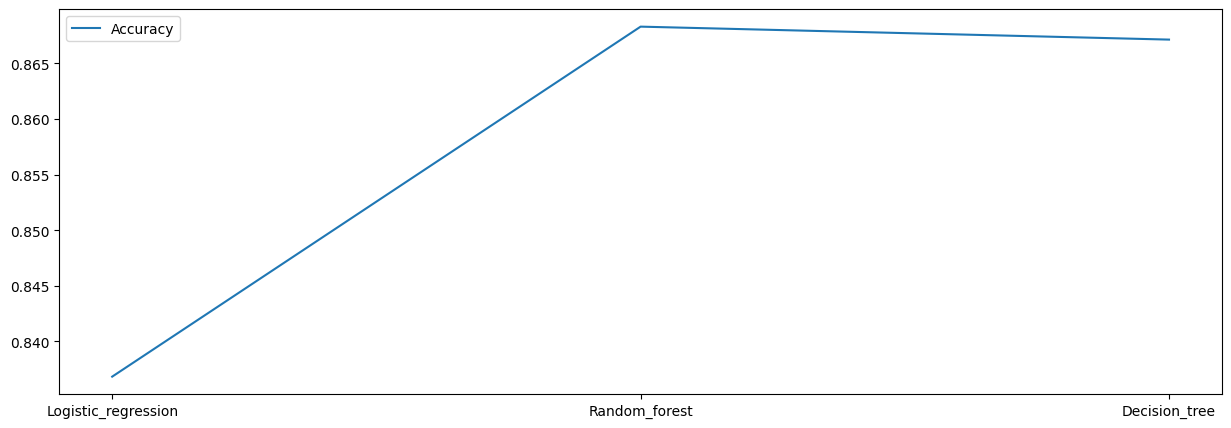

In [53]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()

#**Data visualisation of prediction results**

---



In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


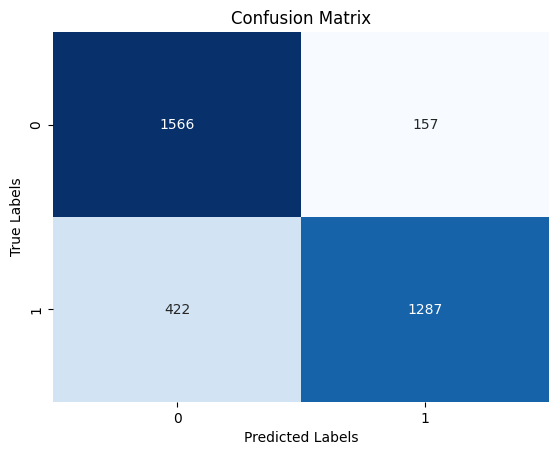

In [55]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_lr_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

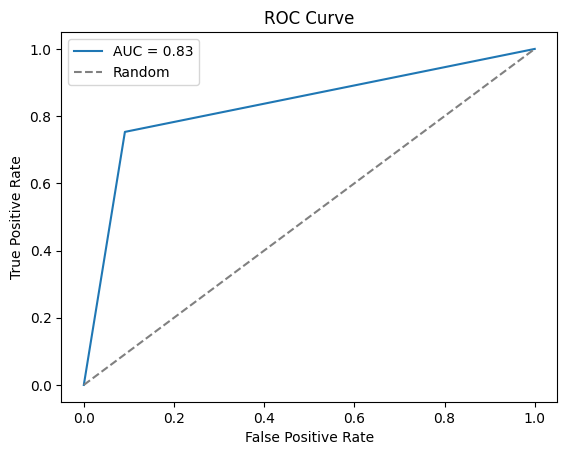

In [56]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_lr_train_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

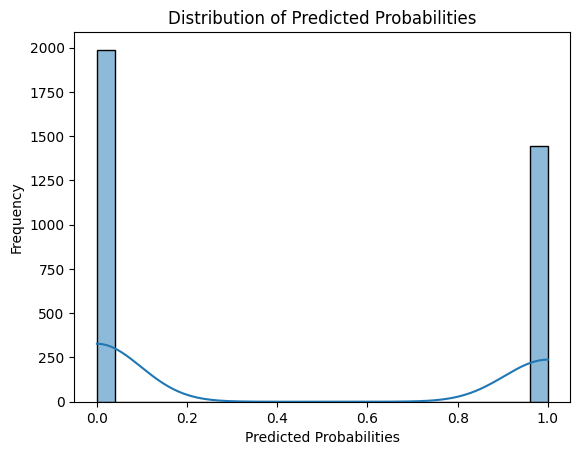

In [57]:
# Probability Distribution Plots
sns.histplot( y_lr_train_pred, bins=25, kde=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

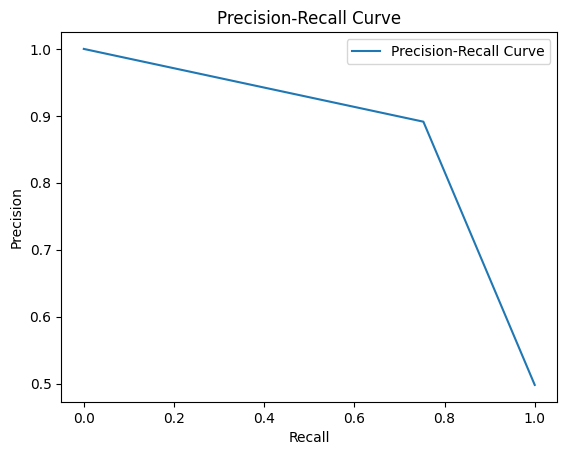

In [58]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_lr_train_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()